Start Model Analysis...
LR: 0.765389 (0.011457)
LDA: 0.670686 (0.009762)
KNN: 0.812095 (0.009952)
CART: 0.865958 (0.003508)
NB: 0.811826 (0.006252)
SVM: 0.873522 (0.006232)
Completed Model Analysis...


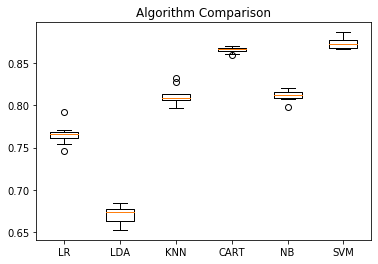

0.8795053933175481
[[528   0   0   0   0   0   0]
 [122 459   0   0   0   0   0]
 [  1   1 501  13   0   0   0]
 [  0   0  86 469   5   0   0]
 [  0   0   0  54 483   6   0]
 [  0   0   0   1  34 482  18]
 [  0   0   0   0   7 110 421]]
              precision    recall  f1-score   support

         1.0       0.81      1.00      0.90       528
         2.0       1.00      0.79      0.88       581
         3.0       0.85      0.97      0.91       516
         4.0       0.87      0.84      0.86       560
         5.0       0.91      0.89      0.90       543
         6.0       0.81      0.90      0.85       535
         7.0       0.96      0.78      0.86       538

    accuracy                           0.88      3801
   macro avg       0.89      0.88      0.88      3801
weighted avg       0.89      0.88      0.88      3801



In [20]:
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

# Read CSV file and import the data as DataFrame
filename = "C:\\Work\\Workspace\\Project\\record.csv"
names = ['name', 'address', 'phoneNumber', 'region','age', 'callCount', 'activeCallTime', 
         'smsCount', 'dataUsage', 'Subscription_1', 'Subscription_2', 
         'Subscription_3', 'Subscription_4', 'plan']
dataset = pd.read_csv(filename, names=names)

# The below values are scrapped since they do not contribute to the prediction
dataset.pop('name')
dataset.pop('address')
dataset.pop('phoneNumber')

#print(dataset.describe())

def descritize(column_name, num_of_bins):
    data = dataset[column_name].values
    df = pd.DataFrame(data,columns=[column_name])
    trans = KBinsDiscretizer(n_bins=num_of_bins, encode='ordinal', strategy='uniform')
    data = trans.fit_transform(df)
    return pd.DataFrame(data)
        
        
# To convert the string to number. Here city names are converted to integer.
le = LabelEncoder()
for col in dataset.columns:
    
    if col == 'region':
        dataset[col] = LabelEncoder().fit_transform(dataset[col])

    if col == 'age':
        dataset[col] = descritize(col, 17)
        
    if col == 'callCount':
        dataset[col] = descritize(col, 8)
    
    if col == 'activeCallTime':
        dataset[col] = descritize(col, 10)
    
    if col == 'smsCount':
        dataset[col] = descritize(col, 20)
    
    if col == 'dataUsage':
        dataset[col] = descritize(col, 120)
    

array = dataset.values
X = array[:,0:9]
y = array[:,10]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
print("Start Model Analysis...")
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

print("Completed Model Analysis...")
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

plan
1    1985
2    2978
3    4368
4    5559
5    2978
6    1389
7     595
dtype: int64
Start Model Analysis...

------------------------------------------------------------
Models                             : Accuracy       Std       
------------------------------------------------------------
Logistic Regression                : 73.320424      0.940342  
Linear Discriminant Analysis       : 71.40067       0.955657  
K-Nearest Neighbour Classifier     : 81.398924      0.958215  
Decision Tree Classifier           : 83.961914      0.713862  
Gaussian Naive Bayes Classifier    : 81.355186      1.017164  
Support Vector Machine             : 87.123074      0.910948  
------------------------------------------------------------

Completed Model Analysis...


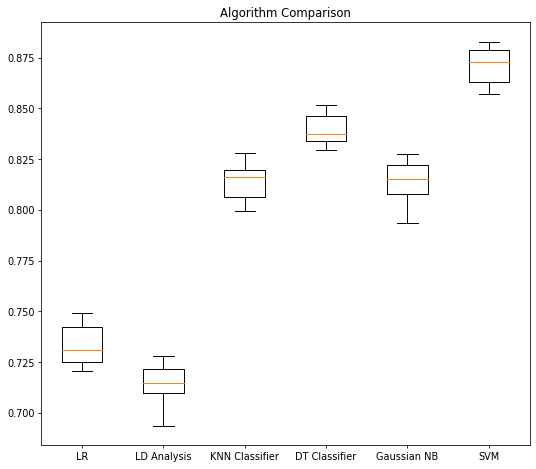

0.8599848904558046
[[367  45   0   0   0   0   0]
 [ 93 526   0   0   0   0   0]
 [  0   3 814  52   0   0   0]
 [  0   0 185 930   8   0   0]
 [  0   0   0  84 466   1   0]
 [  0   0   0   3  37 237   0]
 [  0   0   0   0   1  44  75]]
              precision    recall  f1-score   support

         1.0       0.80      0.89      0.84       412
         2.0       0.92      0.85      0.88       619
         3.0       0.81      0.94      0.87       869
         4.0       0.87      0.83      0.85      1123
         5.0       0.91      0.85      0.88       551
         6.0       0.84      0.86      0.85       277
         7.0       1.00      0.62      0.77       120

    accuracy                           0.86      3971
   macro avg       0.88      0.83      0.85      3971
weighted avg       0.87      0.86      0.86      3971



In [51]:
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib.pyplot import figure

# Read CSV file and import the data as DataFrame
filename = "C:\\Work\\Workspace\\Project\\record_second.csv"
names = ['name', 'address', 'phoneNumber', 'region','age', 'callCount', 'activeCallTime', 
         'smsCount', 'dataUsage', 'Subscription_1', 'Subscription_2', 
         'Subscription_3', 'Subscription_4', 'plan']
dataset = pd.read_csv(filename, names=names)

# The below values are scrapped since they do not contribute to the prediction
dataset.pop('name')
dataset.pop('address')
dataset.pop('phoneNumber')

#print(dataset.describe())
print(dataset.groupby('plan').size())

def descritize(column_name, num_of_bins):
    data = dataset[column_name].values
    df = pd.DataFrame(data,columns=[column_name])
    trans = KBinsDiscretizer(n_bins=num_of_bins, encode='ordinal', strategy='uniform')
    data = trans.fit_transform(df)
    return pd.DataFrame(data)
        
        
# To convert the string to number. Here city names are converted to integer.
le = LabelEncoder()
for col in dataset.columns:
    
    if col == 'region':
        dataset[col] = LabelEncoder().fit_transform(dataset[col])

    if col == 'age':
        dataset[col] = descritize(col, 17)
        
    if col == 'callCount':
        dataset[col] = descritize(col, 8)
    
    if col == 'activeCallTime':
        dataset[col] = descritize(col, 10)
    
    if col == 'smsCount':
        dataset[col] = descritize(col, 20)
    
    if col == 'dataUsage':
        dataset[col] = descritize(col, 120)
    

array = dataset.values
X = array[:,0:9]
y = array[:,10]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', 'Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LD Analysis', 'Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('KNN Classifier', 'K-Nearest Neighbour Classifier', KNeighborsClassifier()))
models.append(('DT Classifier', 'Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian NB', 'Gaussian Naive Bayes Classifier', GaussianNB()))
models.append(('SVM', 'Support Vector Machine', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
print("Start Model Analysis...")
print()
print('-'*60)
print ('{:<35}{:<2}{:<15}{:<10}'.format("Models", ':', 'Accuracy', 'Std'))
print('-'*60)
for short_name, name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(short_name)
	print ('{:<35}{:<2}{:<15}{:<10}'.format(name, ':', round((cv_results.mean()*100),6), round((cv_results.std()*100), 6)))
	#print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
print('-'*60)
print()
print("Completed Model Analysis...")

# Compare Algorithms
figure(num=None, figsize=(9, 8), dpi=70, facecolor='w', edgecolor='k')
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
